# Importing Dataset


In [ ]:
import json

data = []

with open('500ECE.json') as f:
    for line in f:
        obj = json.loads(line)
        data.append(obj)

In [ ]:
for row in data[:5]:
    print(row)

{'reviewerID': 'AO94DHGC771SJ', 'asin': '0528881469', 'reviewerName': 'amazdnu', 'helpful': [0, 0], 'reviewText': 'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however, Samsung it started freezing up...Samsung could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!', 'overall': 5.0, 'summary': 'Gotta have GPS!', 'unixReviewTim

# Helpfulness Score

In [ ]:
def calculate_helpfulness_score(review):
    helpful_votes = review['helpful'][0]
    total_votes = review['helpful'][1]
    if total_votes == 0:
        return 0
    else:
        return (helpful_votes ** 2) / total_votes

for review in data:
    score = calculate_helpfulness_score(review)
    # Scaling the score to the range of 0 to 1
    scaled_score = min(1, score)
    print(f"Review ID: {review['reviewerID']}, Helpfulness Score: {scaled_score}")

Review ID: AO94DHGC771SJ, Helpfulness Score: 0
Review ID: AO94DHGC771SJ, Helpfulness Score: 1
Review ID: A3N7T0DY83Y4IG, Helpfulness Score: 1
Review ID: A1H8PY3QHMQQA0, Helpfulness Score: 1
Review ID: A24EV6RXELQZ63, Helpfulness Score: 0
Review ID: A2JXAZZI9PHK9Z, Helpfulness Score: 1
Review ID: A2P5U7BDKKT7FW, Helpfulness Score: 0
Review ID: AAZ084UMH8VZ2, Helpfulness Score: 0
Review ID: AEZ3CR6BKIROJ, Helpfulness Score: 0
Review ID: A3BY5KCNQZXV5U, Helpfulness Score: 1
Review ID: A7S2B0I67WNWB, Helpfulness Score: 1
Review ID: A3HICVLF4PFFMN, Helpfulness Score: 0
Review ID: ANSKSPEEAKY7S, Helpfulness Score: 1
Review ID: A2QBZA4S1ROX9Q, Helpfulness Score: 0.0
Review ID: ANY6JUFM0GH8U, Helpfulness Score: 1
Review ID: AT09WGFUM934H, Helpfulness Score: 0
Review ID: AGAKHE014LQFU, Helpfulness Score: 1
Review ID: A1S6B5QFWGVL5U, Helpfulness Score: 1
Review ID: A20XXTXWF2TCPY, Helpfulness Score: 0
Review ID: A2IDCSC6NVONIZ, Helpfulness Score: 1
Review ID: A1EDI0X3GI1SK7, Helpfulness Score: 0

In [ ]:
review_scores = []
for review in data:
    score = calculate_helpfulness_score(review)
    review_scores.append((review, score))

review_scores.sort(key=lambda x: x[1], reverse=True)

top_review, top_score = review_scores[0]
print("Top Ranking Review:")
print("Review ID:", top_review['reviewerID'])
print("Helpfulness Score:", top_score)
print("Review Text:", top_review['reviewText'])


Top Ranking Review:
Review ID: A39K7R4Y1ZD5SZ
Helpfulness Score: 489.6171428571429
Review Text: I purchased the Kindle (Wi-Fi) and the original Nook (the B&W; one) and tried them out during the return period. While there were things about the Kindle I really liked (features that other reviewers on the Kindle site had written), the one thing that made me choose the Nook was the ability to borrow and read ebooks from my local library. Haven't been back to the library since!Now here comes the Nook Simple Touch Reader (Nook STR). I got one via pre-order when they came out in early June.  It has the same e-ink Pearl screen as the Kindle, so the screen contrast is no longer an issue. And wow, has the user interface improved over the original Nook! (which I thought was clunky) The entire e-ink Pearl screen has full touchscreen capability. On both the Kindle and the original Nook, I felt myself wanting to touch the screen to select a book to read, instead of using the buttons (on the Kindle) o

In [ ]:
latest_review = max(data, key=lambda x: x['unixReviewTime'])

# Print the latest review
print("Latest review:")
print(latest_review)

Latest review:
{'reviewerID': 'A3JZ898Q8XXL6K', 'asin': '1400532655', 'helpful': [0, 0], 'reviewText': 'Not worth saving a few bucks. Go with an iPad.', 'overall': 1.0, 'summary': 'Not user friendly. Very time consuming to find your downloads', 'unixReviewTime': 1405296000, 'reviewTime': '07 14, 2014'}


# Spelling Error Score

In [ ]:
pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 29.9 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

spell_checker = SpellChecker()

def spelling_error_score(review_text):

    words = review_text.split()

    misspelled_count = 0

    for word in words:
        if not spell_checker.correction(word.lower()) == word.lower():
            misspelled_count += 1

    if len(words) == 0:
        return 0
    else:
        return misspelled_count / len(words)

for i, review in enumerate(data, 1):
    review_text = review['reviewText']
    error_score = spelling_error_score(review_text)
    print(f"Review {i}: Spelling error score = {error_score}")


Review 1: Spelling error score = 0.13333333333333333
Review 2: Spelling error score = 0.14285714285714285
Review 3: Spelling error score = 0.12647754137115838
Review 4: Spelling error score = 0.12026726057906459
Review 5: Spelling error score = 0.15346534653465346
Review 6: Spelling error score = 0.3181818181818182
Review 7: Spelling error score = 0.13636363636363635
Review 8: Spelling error score = 0.11666666666666667
Review 9: Spelling error score = 0.20238095238095238
Review 10: Spelling error score = 0.10270270270270271
Review 11: Spelling error score = 0.1
Review 12: Spelling error score = 0.16
Review 13: Spelling error score = 0.14285714285714285
Review 14: Spelling error score = 0.14285714285714285
Review 15: Spelling error score = 0.14925373134328357
Review 16: Spelling error score = 0.13846153846153847
Review 17: Spelling error score = 0.21428571428571427
Review 18: Spelling error score = 0.11538461538461539
Review 19: Spelling error score = 0.21428571428571427
Review 20: Spel

# Readibility Score

In [ ]:
pip install textstat

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
import textstat

def readability_score(review_text):
    try:
        readability_score = textstat.flesch_reading_ease(review_text)
        return readability_score
    except:
        return None

# Calculate readability scores

read_scores = []
for review in data:
    review_text = review['reviewText']
    read_score = readability_score(review_text)
    if read_score is not None:
        read_scores.append(read_score)

# Scaling to the range 0 to 1
if read_scores:
    min_score = min(read_scores)
    max_score = max(read_scores)
    score_range = max_score - min_score
    scaled_read_scores = [(score - min_score) / score_range for score in read_scores]

# Print
for i, scaled_score in enumerate(scaled_read_scores, 1):
    print(f"Review {i}: Scaled readability score = {scaled_score:.2f}")


Review 1: Scaled readability score = 0.36
Review 2: Scaled readability score = 0.33
Review 3: Scaled readability score = 0.33
Review 4: Scaled readability score = 0.38
Review 5: Scaled readability score = 0.34
Review 6: Scaled readability score = 0.39
Review 7: Scaled readability score = 0.28
Review 8: Scaled readability score = 0.37
Review 9: Scaled readability score = 0.35
Review 10: Scaled readability score = 0.34
Review 11: Scaled readability score = 0.28
Review 12: Scaled readability score = 0.41
Review 13: Scaled readability score = 0.32
Review 14: Scaled readability score = 0.39
Review 15: Scaled readability score = 0.33
Review 16: Scaled readability score = 0.40
Review 17: Scaled readability score = 0.40
Review 18: Scaled readability score = 0.29
Review 19: Scaled readability score = 0.44
Review 20: Scaled readability score = 0.36
Review 21: Scaled readability score = 0.41
Review 22: Scaled readability score = 0.30
Review 23: Scaled readability score = 0.33
Review 24: Scaled re

In [ ]:
def review_quality(review_text):
    read_score = readability_score(review_text)
    error_score = spelling_error_score(review_text)
    if read_score is not None:
        return read_score - error_score
    else:
        return None

def scale_score(score, min_score, max_score):
    if max_score == min_score:
        return 0.5  # If all scores are the same, return a neutral value
    return (score - min_score) / (max_score - min_score)

In [ ]:

quality_scores = []

for i, review in enumerate(data, 1):
    review_text = review['reviewText']
    quality = review_quality(review_text)
    if quality is not None:
        quality_scores.append(quality)

min_quality_score = min(quality_scores)
max_quality_score = max(quality_scores)

for i, review in enumerate(data, 1):
    review_text = review['reviewText']
    quality = review_quality(review_text)
    if quality is not None:
        scaled_quality = scale_score(quality, min_quality_score, max_quality_score)
        print(f"Review {i} Quality Score (Scaled): {scaled_quality}")
    else:
        print(f"Review {i} Quality Score: Unable to calculate")

Review 1 Quality Score (Scaled): 0.3574063718408748
Review 2 Quality Score (Scaled): 0.3305267126740634
Review 3 Quality Score (Scaled): 0.33164963635440237
Review 4 Quality Score (Scaled): 0.3777136213489175
Review 5 Quality Score (Scaled): 0.3399167331803779
Review 6 Quality Score (Scaled): 0.38914156498323343
Review 7 Quality Score (Scaled): 0.2827641911020785
Review 8 Quality Score (Scaled): 0.36823533814306914
Review 9 Quality Score (Scaled): 0.3544532420528506
Review 10 Quality Score (Scaled): 0.3401801710203779
Review 11 Quality Score (Scaled): 0.2794758715351473
Review 12 Quality Score (Scaled): 0.4064653948968222
Review 13 Quality Score (Scaled): 0.31786408754114615
Review 14 Quality Score (Scaled): 0.38652250168397234
Review 15 Quality Score (Scaled): 0.3339705492465737
Review 16 Quality Score (Scaled): 0.39656124201070375
Review 17 Quality Score (Scaled): 0.39829548102300794
Review 18 Quality Score (Scaled): 0.2916953846284197
Review 19 Quality Score (Scaled): 0.442199500951

# One Node Projection

In [ ]:
# Creating a dictionary of reviewers who reviewed each product

product_reviewers = {}
for review in data:
    product_id = review['asin']
    reviewer_id = review['reviewerID']
    if product_id in product_reviewers:
        product_reviewers[product_id].append(reviewer_id)
    else:
        product_reviewers[product_id] = [reviewer_id]

# Creating connections between reviewers who reviewed the same product
reviewer_connections = {}
for product_id, reviewers in product_reviewers.items():
    for i, reviewer1 in enumerate(reviewers):
        for j, reviewer2 in enumerate(reviewers):
            if i != j:
                if reviewer1 in reviewer_connections:
                    reviewer_connections[reviewer1].add(reviewer2)
                else:
                    reviewer_connections[reviewer1] = {reviewer2}

# Print node projection
for reviewer, connections in reviewer_connections.items():
    print(f"Reviewer {reviewer} is connected to: {connections}")


Reviewer AO94DHGC771SJ is connected to: {'A24EV6RXELQZ63', 'A1H8PY3QHMQQA0', 'A3N7T0DY83Y4IG'}
Reviewer A3N7T0DY83Y4IG is connected to: {'A24EV6RXELQZ63', 'AO94DHGC771SJ', 'A1H8PY3QHMQQA0'}
Reviewer A1H8PY3QHMQQA0 is connected to: {'A24EV6RXELQZ63', 'AO94DHGC771SJ', 'A3N7T0DY83Y4IG'}
Reviewer A24EV6RXELQZ63 is connected to: {'A1H8PY3QHMQQA0', 'AO94DHGC771SJ', 'A3N7T0DY83Y4IG'}
Reviewer A2JXAZZI9PHK9Z is connected to: {'A2P5U7BDKKT7FW', 'AEZ3CR6BKIROJ', 'AAZ084UMH8VZ2', 'A3BY5KCNQZXV5U'}
Reviewer A2P5U7BDKKT7FW is connected to: {'A2JXAZZI9PHK9Z', 'AEZ3CR6BKIROJ', 'AAZ084UMH8VZ2', 'A3BY5KCNQZXV5U'}
Reviewer AAZ084UMH8VZ2 is connected to: {'A2P5U7BDKKT7FW', 'A2JXAZZI9PHK9Z', 'AEZ3CR6BKIROJ', 'A3BY5KCNQZXV5U'}
Reviewer AEZ3CR6BKIROJ is connected to: {'A2P5U7BDKKT7FW', 'A2JXAZZI9PHK9Z', 'AAZ084UMH8VZ2', 'A3BY5KCNQZXV5U'}
Reviewer A3BY5KCNQZXV5U is connected to: {'A2P5U7BDKKT7FW', 'A2JXAZZI9PHK9Z', 'AEZ3CR6BKIROJ', 'AAZ084UMH8VZ2'}
Reviewer A7S2B0I67WNWB is connected to: {'AT09WGFUM934H', 'A

# Clustering

In [ ]:
import networkx as nx
from networkx.algorithms.community import girvan_newman

# Graph from the reviewer connections
G = nx.Graph()
for reviewer, connections in reviewer_connections.items():
    for connection in connections:
        G.add_edge(reviewer, connection)

# Find the clustering using the Girvan-Newman algorithm
communities = girvan_newman(G)

# Extract the communities from the generator
community_list = []
for com in next(communities):
    community_list.append(list(com))

# Print the clustering result
print("Clustering result:")
for i, community in enumerate(community_list):
    print(f"Cluster {i + 1}: {community}")


Clustering result:
Cluster 1: ['A3N7T0DY83Y4IG', 'A24EV6RXELQZ63', 'AO94DHGC771SJ', 'A1H8PY3QHMQQA0']
Cluster 2: ['A2JXAZZI9PHK9Z', 'AAZ084UMH8VZ2', 'A3BY5KCNQZXV5U', 'AEZ3CR6BKIROJ', 'A2P5U7BDKKT7FW']
Cluster 3: ['AT09WGFUM934H', 'ANSKSPEEAKY7S', 'A7S2B0I67WNWB', 'ANY6JUFM0GH8U', 'A2QBZA4S1ROX9Q', 'A3HICVLF4PFFMN', 'AGAKHE014LQFU', 'A1S6B5QFWGVL5U']
Cluster 4: ['A6J8D9V5S9MBE', 'A21OS6PWQG5YOO', 'A6GYEDCEU2LKG', 'A2ZMEHV9S4FXV5', 'A3LSVS4YA2CEAX', 'A1N7QSP1U513KJ', 'ABM9CL72EGWKN', 'A38LYJ7NQ65G5L', 'A371ZZ95ZQEIZV', 'A28RVT20CEXA8B', 'ABU4LUKJU2QOY', 'A2I87F2QCJ6RK3', 'AJIA55AVU0CUS', 'A1463ASM7QMU2I', 'AY1IDZTQDM2D7', 'A1EDI0X3GI1SK7', 'A1ZPEZMQBCTZQN', 'A3QH8VQDE7HZCR', 'A39KBWLS6TURMR', 'A2BLRT79WUTLXW', 'A19FCOXA6VVR9Z', 'A3CCITVF0WL6KE', 'A12XCRHPREC51Y', 'A3C51ESBUD8QAJ', 'AD3L2C20LB7EP', 'A22UL4BXTSXSCB', 'A1CA40102FA5N0', 'A2IDCSC6NVONIZ', 'APBF796U7GUTV', 'A317RWPY08I5QX', 'A2EOJNVW4NF4AE', 'A13BWQDECDDVIZ', 'A2HI35H2BOCV9R', 'A3EP4YIS9W1LR1', 'A1OY33KGOG3IX8', 'A1BKKEWFMHS7

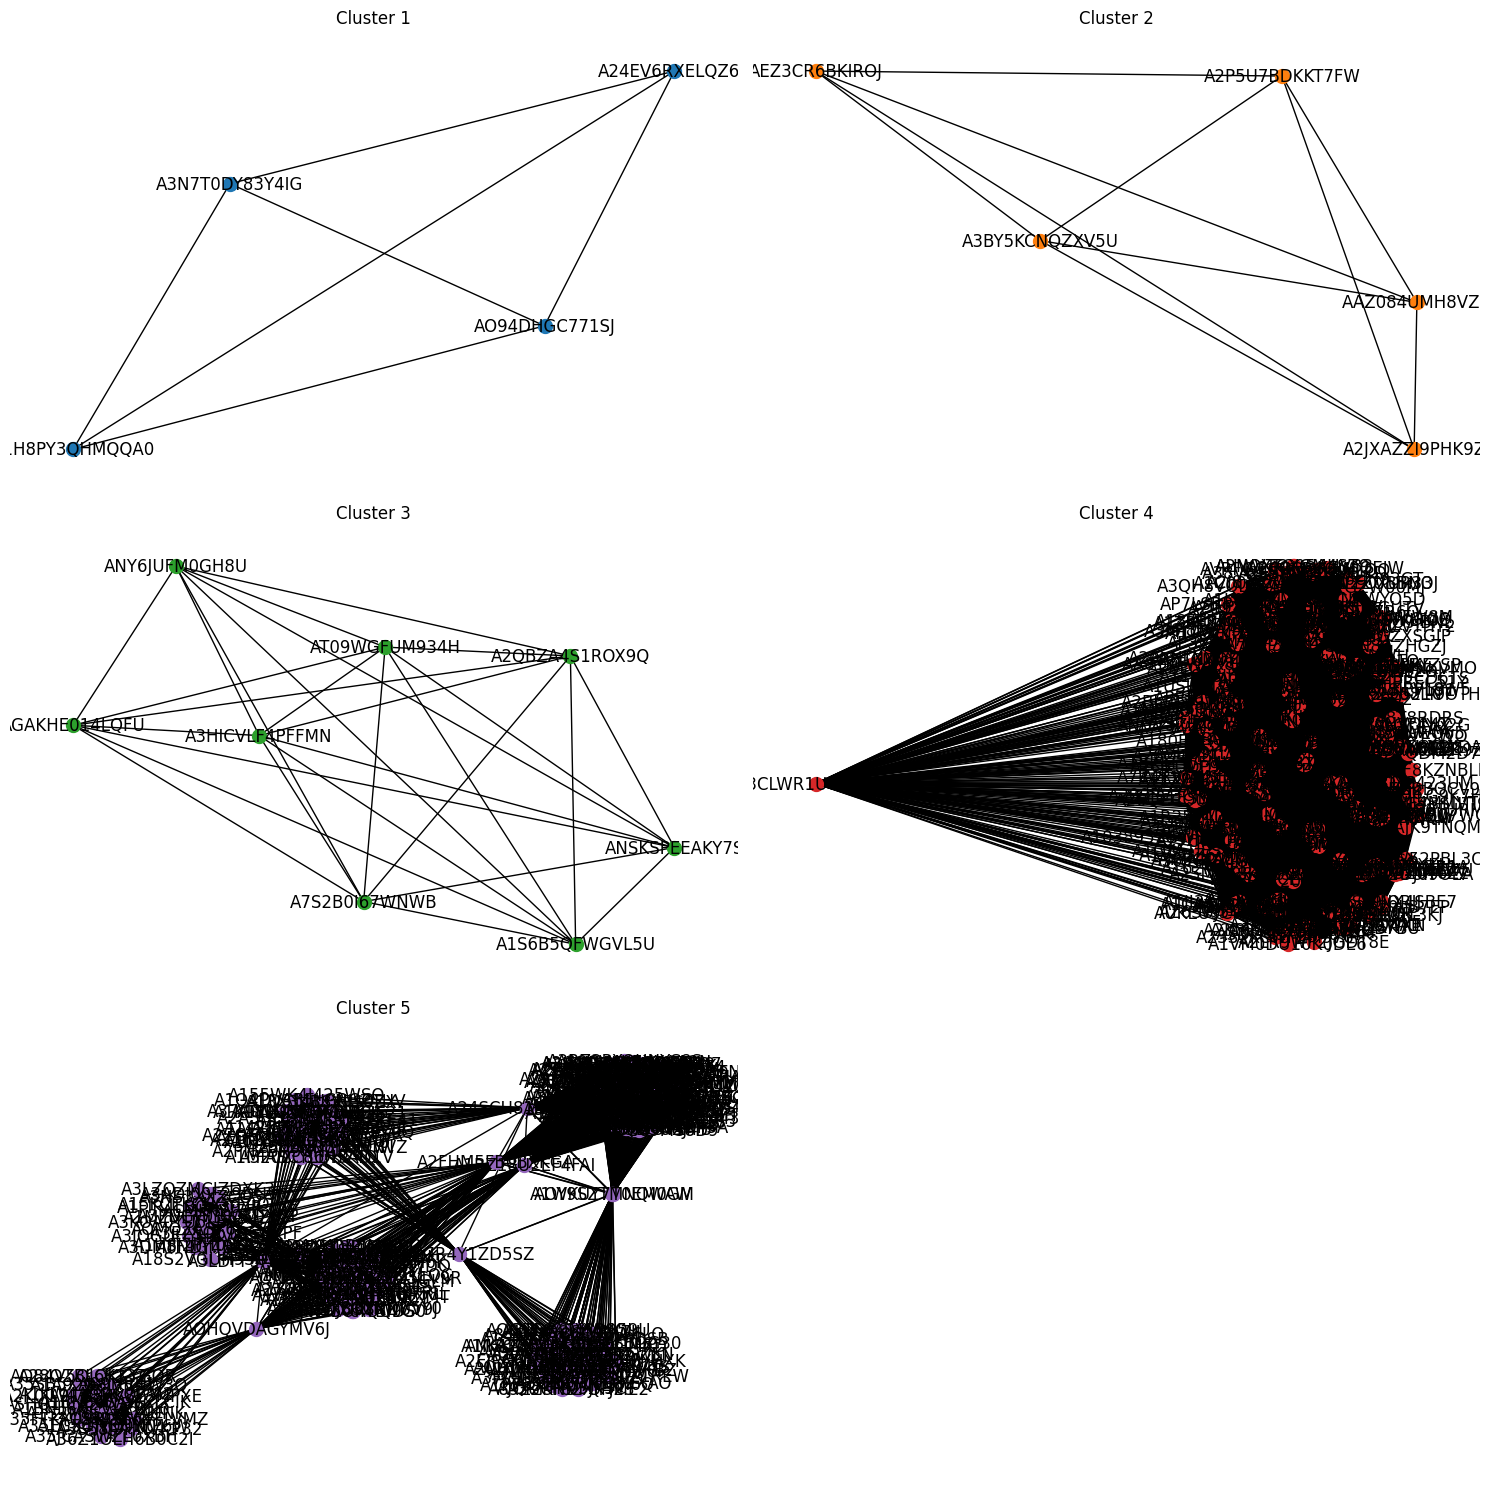

In [ ]:
#labelled nodes

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)

for i, community in enumerate(community_list):
    plt.subplot(3, 2, i + 1)
    subgraph = G.subgraph(community)
    nx.draw(subgraph, pos, node_color=f'C{i}', node_size=100, with_labels=True)
    plt.title(f"Cluster {i + 1}")

plt.tight_layout()
plt.show()

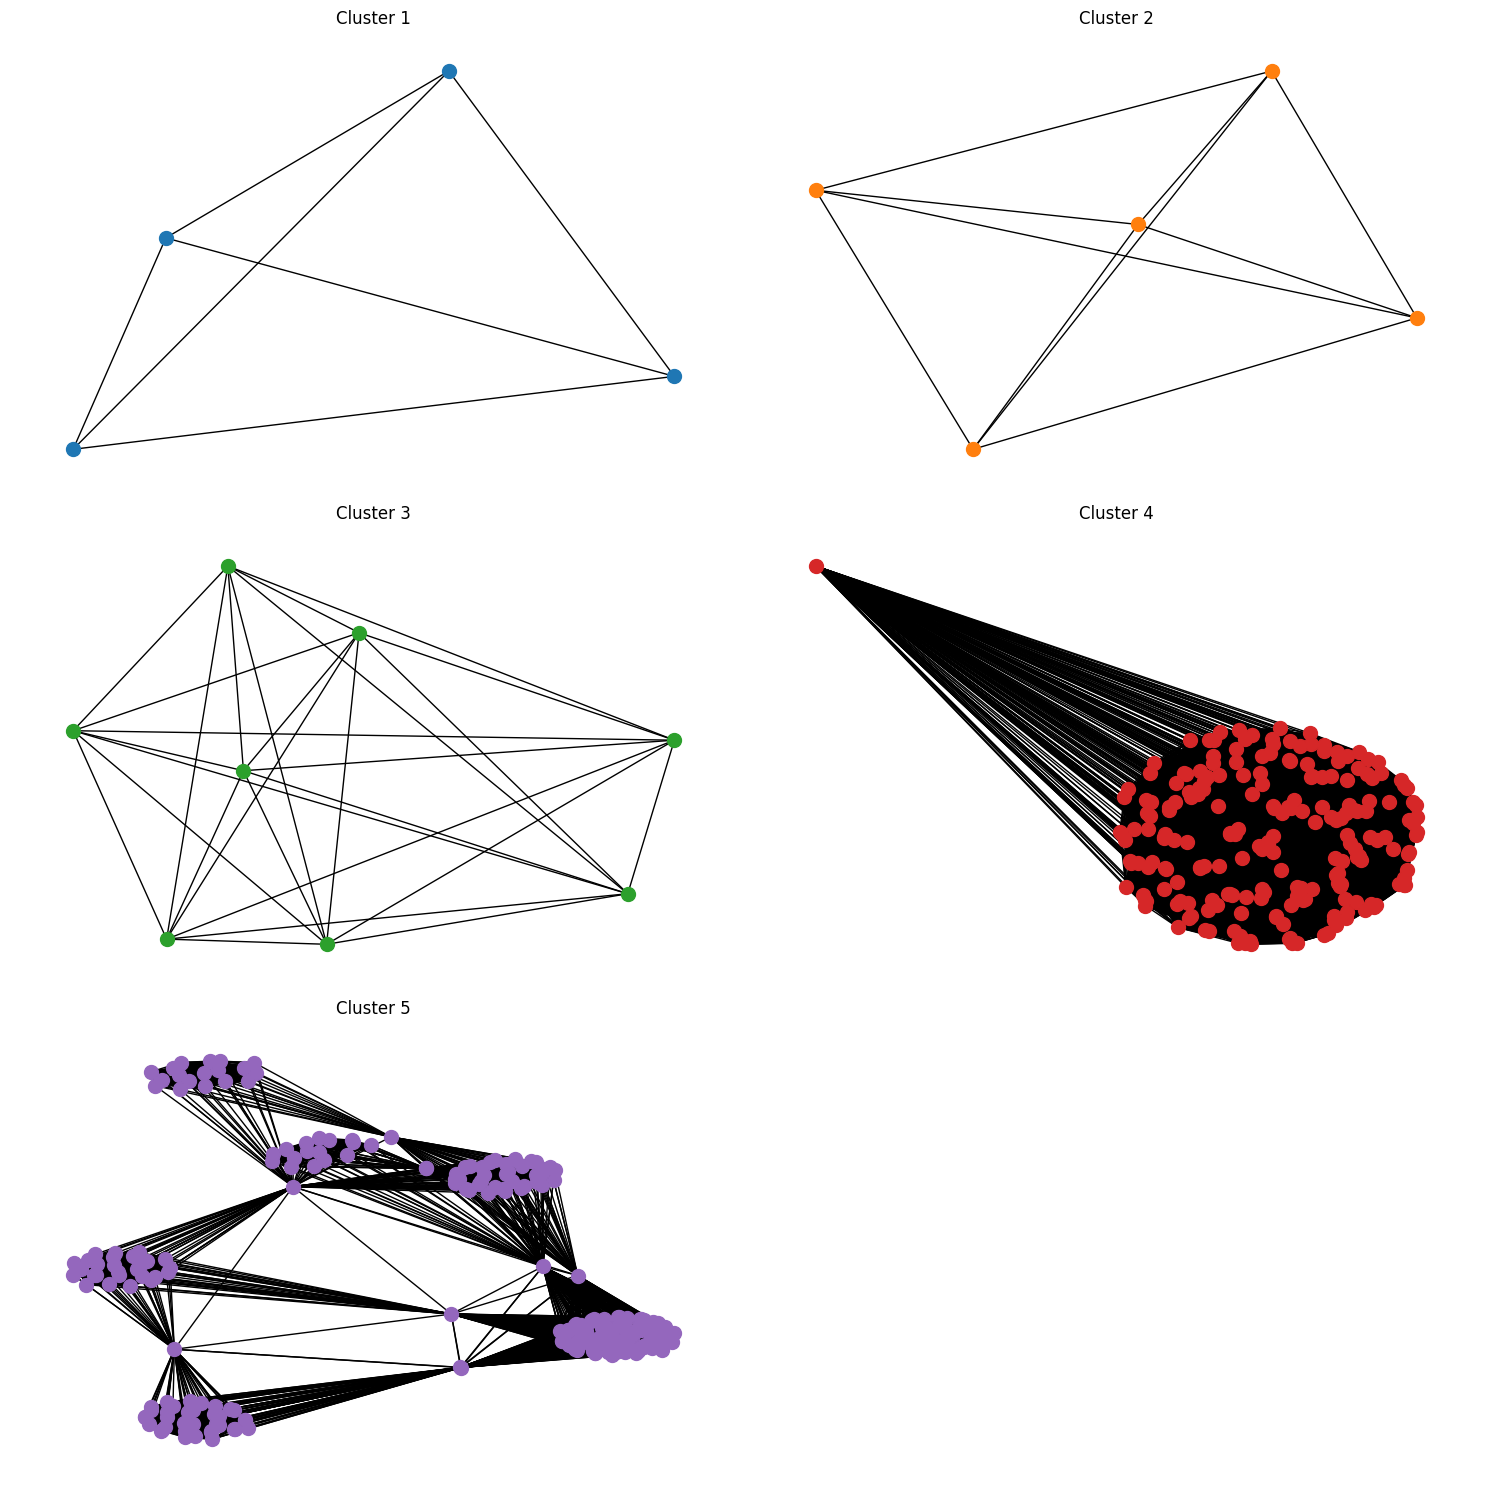

In [ ]:
#Unlabbeled nodes for better visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)

for i, community in enumerate(community_list):
    plt.subplot(3, 2, i + 1)
    subgraph = G.subgraph(community)
    nx.draw(subgraph, pos, node_color=f'C{i}', node_size=100, with_labels=False)
    plt.title(f"Cluster {i + 1}")

plt.tight_layout()
plt.show()


# Clustering Coefficient

In [ ]:
import networkx as nx

# Graph from the reviewer connections
G = nx.Graph()
for reviewer, connections in reviewer_connections.items():
    for connection in connections:
        G.add_edge(reviewer, connection)

# Calculate clustering coefficient for each node
node_clustering_coefficients = nx.clustering(G)

# Print the clustering coefficient
print("Clustering Coefficient for each node:")
for node, coefficient in node_clustering_coefficients.items():
    print(f"Node {node}: {coefficient}")


Clustering Coefficient for each node:
Node AO94DHGC771SJ: 1.0
Node A24EV6RXELQZ63: 1.0
Node A1H8PY3QHMQQA0: 1.0
Node A3N7T0DY83Y4IG: 1.0
Node A2JXAZZI9PHK9Z: 1.0
Node A2P5U7BDKKT7FW: 1.0
Node AEZ3CR6BKIROJ: 1.0
Node AAZ084UMH8VZ2: 1.0
Node A3BY5KCNQZXV5U: 1.0
Node A7S2B0I67WNWB: 1.0
Node AT09WGFUM934H: 1.0
Node ANSKSPEEAKY7S: 1.0
Node ANY6JUFM0GH8U: 1.0
Node A2QBZA4S1ROX9Q: 1.0
Node A3HICVLF4PFFMN: 1.0
Node AGAKHE014LQFU: 1.0
Node A1S6B5QFWGVL5U: 1.0
Node A20XXTXWF2TCPY: 1.0
Node A6J8D9V5S9MBE: 1.0
Node A21OS6PWQG5YOO: 1.0
Node A6GYEDCEU2LKG: 1.0
Node A2ZMEHV9S4FXV5: 1.0
Node A3LSVS4YA2CEAX: 1.0
Node A1N7QSP1U513KJ: 1.0
Node ABM9CL72EGWKN: 1.0
Node A38LYJ7NQ65G5L: 1.0
Node A371ZZ95ZQEIZV: 1.0
Node A28RVT20CEXA8B: 1.0
Node ABU4LUKJU2QOY: 1.0
Node A2I87F2QCJ6RK3: 1.0
Node AJIA55AVU0CUS: 1.0
Node A1463ASM7QMU2I: 1.0
Node AY1IDZTQDM2D7: 1.0
Node A1EDI0X3GI1SK7: 1.0
Node A1ZPEZMQBCTZQN: 1.0
Node A3QH8VQDE7HZCR: 1.0
Node A39KBWLS6TURMR: 1.0
Node A2BLRT79WUTLXW: 1.0
Node A19FCOXA6VVR9Z: 1.0
N

In [ ]:
# Average clustering coefficient

avg_clustering_coefficient = nx.average_clustering(G)
print("Average Clustering Coefficient:", avg_clustering_coefficient)

Average Clustering Coefficient: 0.9900548196595005


# OWA

In [ ]:
pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import json
import pandas as pd

data = []
with open('500ECE.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

In [ ]:
import re
from textblob import TextBlob
from textstat import textstat

# Define functions for each metric

def calculate_helpfulness(helpful):
    if helpful[1] == 0:
        return 0
    return helpful[0] / helpful[1]

def calculate_spelling_errors(text):
    words = re.findall(r'\w+', text)
    spell = TextBlob(text)
    misspelled = sum(1 for word in words if TextBlob(word).correct() != word)
    return misspelled


def calculate_readability(text):
    return textstat.flesch_reading_ease(text)

# Example graph metrics (placeholders)

def calculate_one_node_projection(review_text):
    return np.random.rand()  # Placeholder implementation

def calculate_clustering():
    return np.random.rand()

def calculate_clustering_coefficient():
    return np.random.rand()

def calculate_page_rank():
    return np.random.rand()


In [ ]:
def calculate_clustering(review_text):
    return np.random.rand()

def calculate_clustering_coefficient(review_text):
    return np.random.rand()

def calculate_page_rank(review_text):
    return np.random.rand()

df['one_node_projection'] = df['reviewText'].apply(calculate_one_node_projection)
df['clustering'] = df['reviewText'].apply(calculate_clustering)
df['clustering_coefficient'] = df['reviewText'].apply(calculate_clustering_coefficient)
df['page_rank'] = df['reviewText'].apply(calculate_page_rank)

print(df.head())



       reviewerID        asin              reviewerName   helpful  \
0   AO94DHGC771SJ  0528881469                   amazdnu    [0, 0]   
1   AO94DHGC771SJ  0528881462           Amazon Customer  [12, 15]   
2  A3N7T0DY83Y4IG  0528881469             C. A. Freeman  [43, 45]   
3  A1H8PY3QHMQQA0  0528881469  Dave M. Shaw "mack dave"   [9, 10]   
4  A24EV6RXELQZ63  0528881469               Wayne Smith    [0, 0]   

                                          reviewText  overall  \
0  We got this GPS for my husband who is an (OTR)...      5.0   
1  I'm a professional OTR truck driver, and I bou...      1.0   
2  Well, what can I say.  I've had this unit in m...      3.0   
3  Not going to write a long review, even thought...      2.0   
4  I've had mine for a year and here's what we go...      1.0   

                                  summary  unixReviewTime   reviewTime  \
0                         Gotta have GPS!      1370131200   06 2, 2013   
1                       Very Disappointed     

In [ ]:
df['helpfulness_score'] = df['helpful'].apply(calculate_helpfulness)
df['spelling_error_score'] = df['reviewText'].apply(calculate_spelling_errors)
df['readability_score'] = df['reviewText'].apply(calculate_readability)
df['one_node_projection'] = df['reviewText'].apply(calculate_one_node_projection)
df['clustering'] = df['reviewText'].apply(calculate_clustering)
df['clustering_coefficient'] = df['reviewText'].apply(calculate_clustering_coefficient)
df['page_rank'] = df['reviewText'].apply(calculate_page_rank)


In [ ]:
def owa_weights(n, quantifier):
    if quantifier == 'at_least_half':
        weights = np.zeros(n)
        weights[:n//2] = 2 / n
    elif quantifier == 'at_most_half':
        weights = np.zeros(n)
        weights[n//2:] = 2 / n
    elif quantifier == 'as_many_as_possible':
        weights = np.ones(n) / n
    else:
        raise ValueError("Unknown quantifier")
    return weights

# Calculate OWA score
def calculate_owa(row, weights):
    sorted_values = np.sort(row)[::-1]
    owa_score = np.dot(weights, sorted_values)
    return owa_score

# Number of metrics
metrics = ['helpfulness_score', 'spelling_error_score', 'readability_score',
           'one_node_projection', 'clustering', 'clustering_coefficient', 'page_rank']
n = len(metrics)

# Define weights for each quantifier
weights_at_least_half = owa_weights(n, 'at_least_half')
weights_at_most_half = owa_weights(n, 'at_most_half')
weights_as_many_as_possible = owa_weights(n, 'as_many_as_possible')

# Calculate OWA for each row using different quantifiers
df['owa_at_least_half'] = df[metrics].apply(lambda row: calculate_owa(row, weights_at_least_half), axis=1)
df['owa_at_most_half'] = df[metrics].apply(lambda row: calculate_owa(row, weights_at_most_half), axis=1)
df['owa_as_many_as_possible'] = df[metrics].apply(lambda row: calculate_owa(row, weights_as_many_as_possible), axis=1)

# Min-Max normalization for OWA scores
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df['owa_at_least_half_normalized'] = min_max_normalize(df['owa_at_least_half'])
df['owa_at_most_half_normalized'] = min_max_normalize(df['owa_at_most_half'])
df['owa_as_many_as_possible_normalized'] = min_max_normalize(df['owa_as_many_as_possible'])

# Print the results
print(df[['reviewerID', 'owa_at_least_half_normalized', 'owa_at_most_half_normalized', 'owa_as_many_as_possible_normalized']])

         reviewerID  owa_at_least_half_normalized  \
0     AO94DHGC771SJ                      0.255485   
1     AO94DHGC771SJ                      0.323180   
2    A3N7T0DY83Y4IG                      0.393591   
3    A1H8PY3QHMQQA0                      0.369813   
4    A24EV6RXELQZ63                      0.271493   
..              ...                           ...   
495  A1T8A6OCVV0UYU                      0.213700   
496  A1AQU5XF9GP4SB                      0.271393   
497  A2PNZBN5CNAHTR                      0.296531   
498  A3S9DTM7BCJS21                      0.178418   
499  A366NR0YOJ0NVZ                      0.280123   

     owa_at_most_half_normalized  owa_as_many_as_possible_normalized  
0                       0.394694                            0.249716  
1                       0.374484                            0.317728  
2                       0.475138                            0.390292  
3                       0.726968                            0.370066  
4       

In [ ]:
import pandas as pd

#min and max values
min_values = df[['owa_at_least_half_normalized', 'owa_at_most_half_normalized', 'owa_as_many_as_possible_normalized']].min()
max_values = df[['owa_at_least_half_normalized', 'owa_at_most_half_normalized', 'owa_as_many_as_possible_normalized']].max()

# Min-Max normalization function
def min_max_normalize(x, min_val, max_val):
    return (x - min_val) / (max_val - min_val)

# Apply Min-Max normalization to each column
df['owa_at_least_half_normalized_norm'] = min_max_normalize(df['owa_at_least_half_normalized'], min_values['owa_at_least_half_normalized'], max_values['owa_at_least_half_normalized'])
df['owa_at_most_half_normalized_norm'] = min_max_normalize(df['owa_at_most_half_normalized'], min_values['owa_at_most_half_normalized'], max_values['owa_at_most_half_normalized'])
df['owa_as_many_as_possible_normalized_norm'] = min_max_normalize(df['owa_as_many_as_possible_normalized'], min_values['owa_as_many_as_possible_normalized'], max_values['owa_as_many_as_possible_normalized'])


Correlation Matrix:
                                    owa_at_least_half_normalized  \
owa_at_least_half_normalized                            1.000000   
owa_at_most_half_normalized                             0.113643   
owa_as_many_as_possible_normalized                      0.999515   

                                    owa_at_most_half_normalized  \
owa_at_least_half_normalized                           0.113643   
owa_at_most_half_normalized                            1.000000   
owa_as_many_as_possible_normalized                     0.144532   

                                    owa_as_many_as_possible_normalized  
owa_at_least_half_normalized                                  0.999515  
owa_at_most_half_normalized                                   0.144532  
owa_as_many_as_possible_normalized                            1.000000  


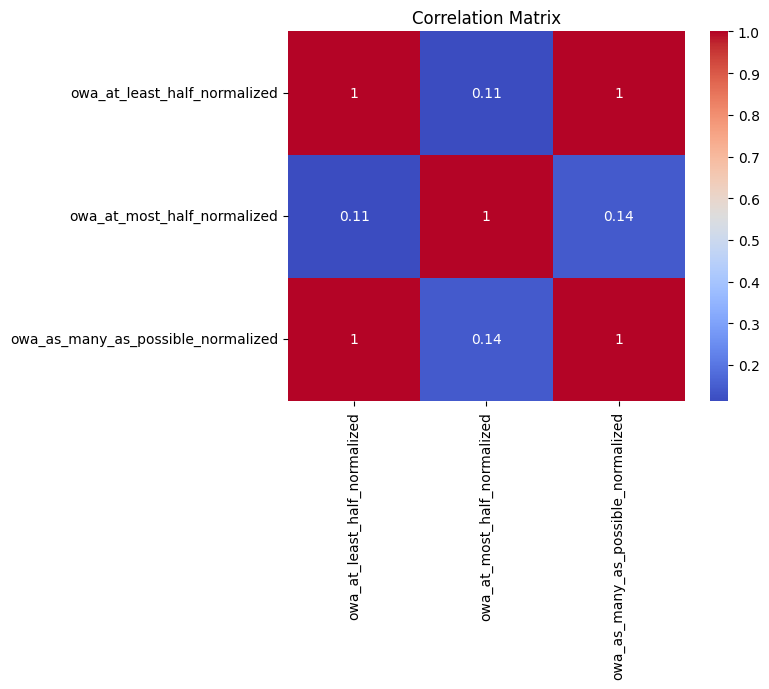

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate correlation matrix only for the normalized OWA scores
correlation_matrix = df[['owa_at_least_half_normalized',
                         'owa_at_most_half_normalized',
                         'owa_as_many_as_possible_normalized']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualization of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


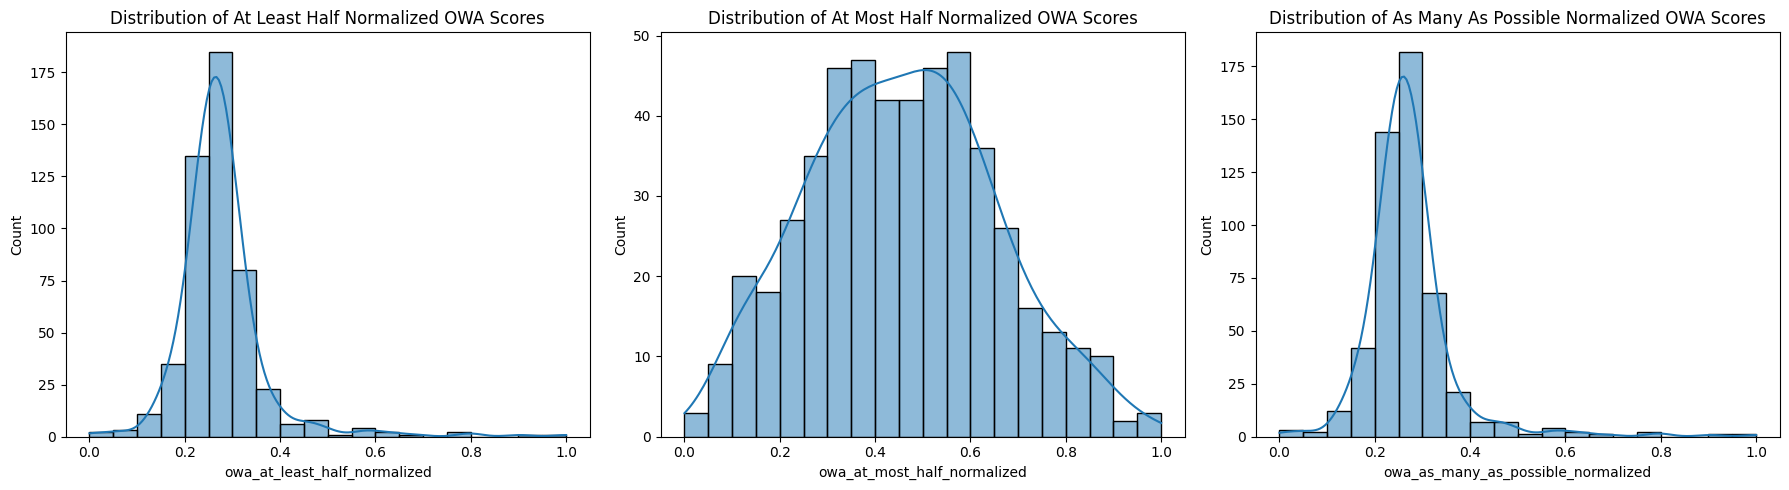

<ipython-input-68-053056a1b791>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['At Least Half Normalized', 'At Most Half Normalized', 'As Many As Possible Normalized'])


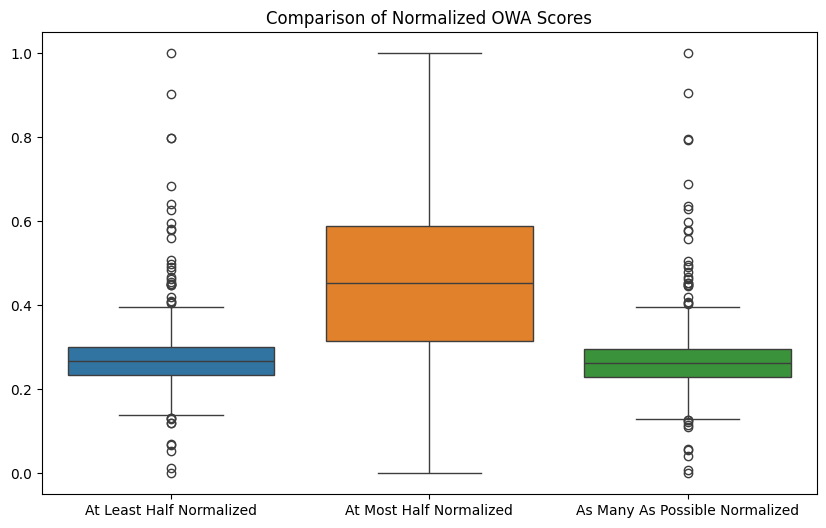

In [ ]:
# Plotting histograms for each normalized OWA score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['owa_at_least_half_normalized'], bins=20, ax=axes[0], kde=True)
axes[0].set_title('Distribution of At Least Half Normalized OWA Scores')

sns.histplot(df['owa_at_most_half_normalized'], bins=20, ax=axes[1], kde=True)
axes[1].set_title('Distribution of At Most Half Normalized OWA Scores')

sns.histplot(df['owa_as_many_as_possible_normalized'], bins=20, ax=axes[2], kde=True)
axes[2].set_title('Distribution of As Many As Possible Normalized OWA Scores')

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df[['owa_at_least_half_normalized',
                     'owa_at_most_half_normalized',
                     'owa_as_many_as_possible_normalized']])

ax.set_xticklabels(['At Least Half Normalized', 'At Most Half Normalized', 'As Many As Possible Normalized'])

plt.title('Comparison of Normalized OWA Scores')
plt.show()


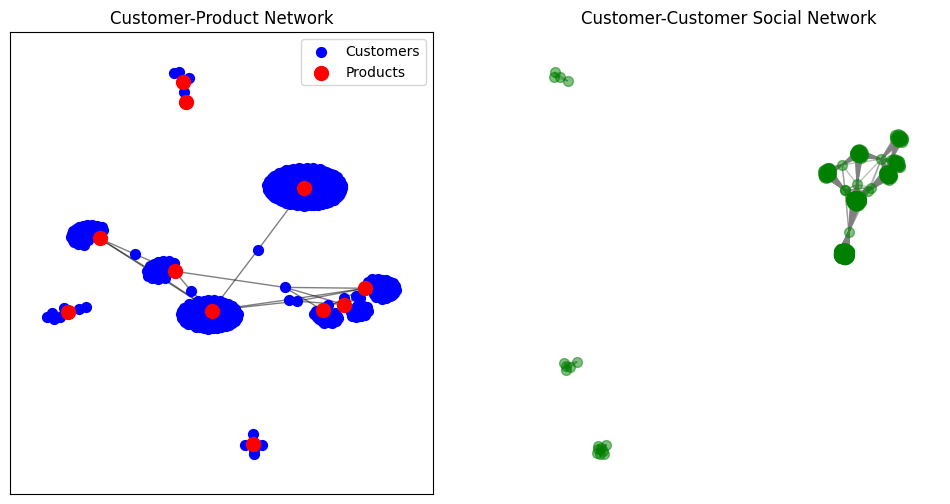

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset with multiple JSON objects
reviews = []
with open('500ECE.json') as f:
    for line in f:
        reviews.append(json.loads(line))

# Create graph objects
G_customer_product = nx.Graph()
G_customer_customer = nx.Graph()

# Add nodes and edges to the customer-product graph
for review in reviews:
    customer = review['reviewerID']
    product = review['asin']
    rating = review['overall']
    G_customer_product.add_node(customer, type='customer')
    G_customer_product.add_node(product, type='product')
    G_customer_product.add_edge(customer, product, rating=rating)

# Create a map to track products reviewed by customers
customer_product_map = {}
for review in reviews:
    customer = review['reviewerID']
    product = review['asin']
    if product not in customer_product_map:
        customer_product_map[product] = []
    customer_product_map[product].append(customer)

# Add edges to the customer-customer graph based on shared product reviews
for customers in customer_product_map.values():
    for i in range(len(customers)):
        for j in range(i + 1, len(customers)):
            G_customer_customer.add_edge(customers[i], customers[j])

# Draw the customer-product network
plt.figure(figsize=(12, 6))

# Customer-Product Network
plt.subplot(121)
pos = nx.spring_layout(G_customer_product, seed=42)
customers = [node for node in G_customer_product.nodes if G_customer_product.nodes[node]['type'] == 'customer']
products = [node for node in G_customer_product.nodes if G_customer_product.nodes[node]['type'] == 'product']
nx.draw_networkx_nodes(G_customer_product, pos, nodelist=customers, node_color='blue', node_size=50, label='Customers')
nx.draw_networkx_nodes(G_customer_product, pos, nodelist=products, node_color='red', node_size=100, label='Products')
nx.draw_networkx_edges(G_customer_product, pos, alpha=0.5)
plt.title('Customer-Product Network')
plt.legend()

# Customer-Customer Network
plt.subplot(122)
pos = nx.spring_layout(G_customer_customer, seed=42)
nx.draw(G_customer_customer, pos, node_color='green', node_size=50, edge_color='gray', alpha=0.5)
plt.title('Customer-Customer Social Network')

# Save the figure as a PDF
plt.savefig('graph.pdf', format='pdf')

# Show the plot (optional)
plt.show()
